In [84]:
import os

# List files in the directory
print(os.listdir(r'C:\Users\hp\Music\data'))
import os
print(os.getcwd())
import pandas as pd
import os

# List files to check if 'togo-dapaong_qc.csv' exists
print(os.listdir(r'C:\Users\hp\Music\data'))

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\hp\Music\data\sierraleone-bumbuna.csv', encoding='latin-1')

# Display the first few rows
df.head()

['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']
c:\Users\hp\Documents\Custom Office Templates\10 academy\solar-energy_-challenge_week1-\notebooks
['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [85]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [86]:
missing_values = df.isna().sum()
print(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [87]:
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100
columns_with_missing = missing_percentage[missing_percentage > 5]

print(columns_with_missing)

Comments    100.0
dtype: float64


In [88]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))

# Remove outliers
df_clean = df[(z_scores < 3).all(axis=1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_19668\1295935827.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')


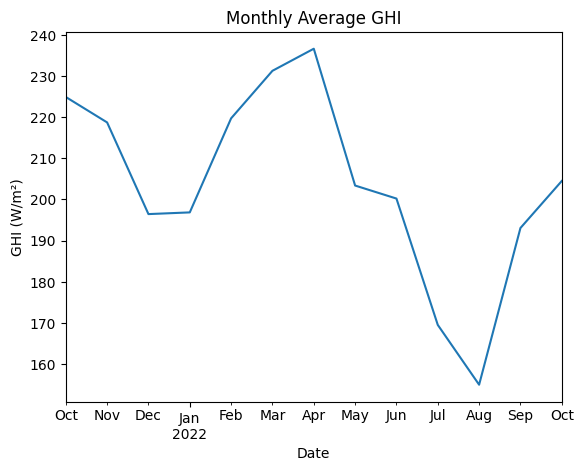

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\sierraleone-bumbuna.csv', encoding='latin-1')

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Resample data by month and plot
df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

In [90]:
print(df.head())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:03:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:04:00      0.0  0.0      0.0  1002         0            0.1   
2021-10-30 0

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [92]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [93]:
df.set_index('Timestamp', inplace=True)

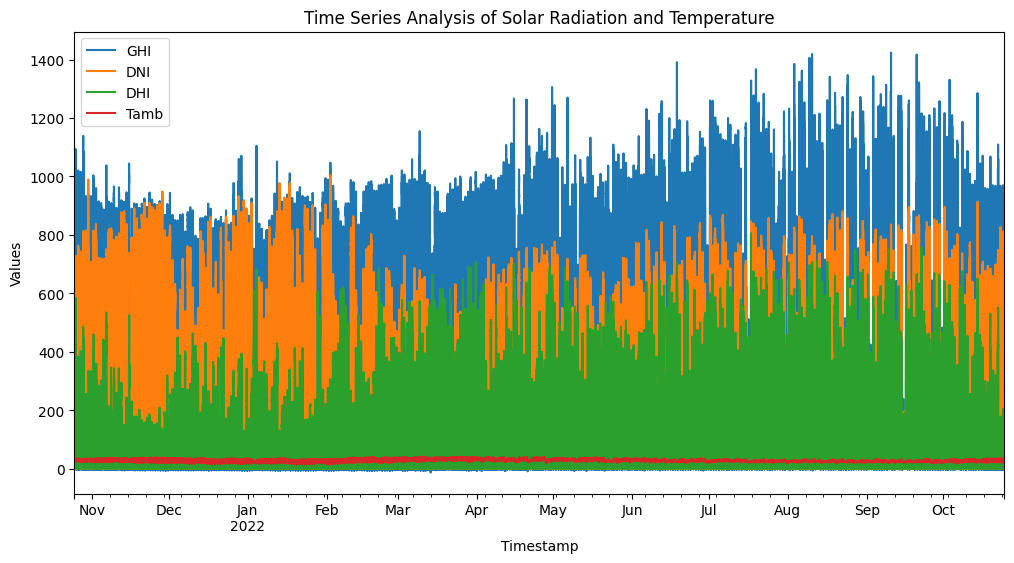

In [94]:
# Plotting GHI, DNI, DHI, and Tamb against Timestamp
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Time Series Analysis of Solar Radiation and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

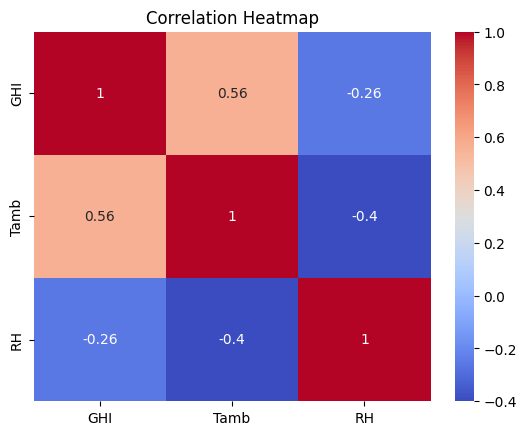

In [95]:
import seaborn as sns

# Create a heatmap for GHI, Temperature, and Relative Humidity
sns.heatmap(df[['GHI', 'Tamb', 'RH']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [96]:
from scipy.stats import zscore

# Compute Z-scores for specified columns
df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] = zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

In [97]:
# Flagging outliers
outliers = (abs(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]) > 3)

<Axes: xlabel='Cleaning'>

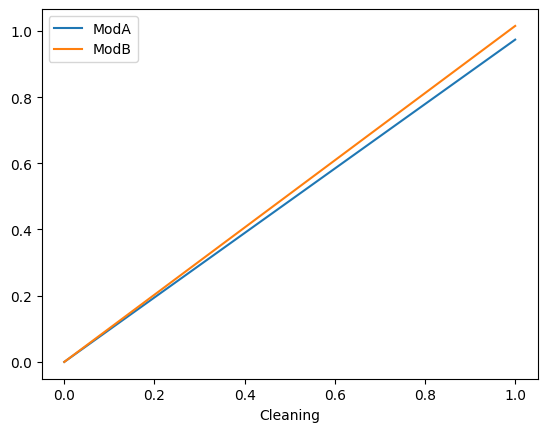

In [98]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot()

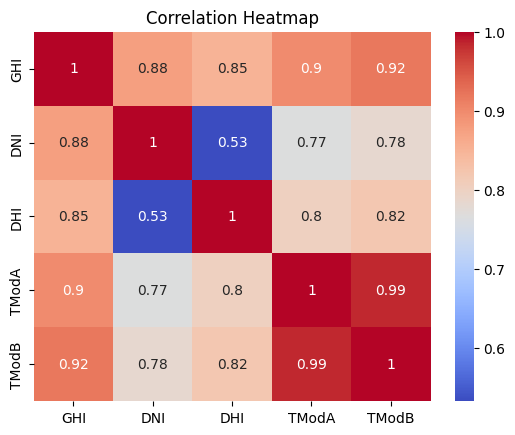

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt  # Also import matplotlib for plotting
# Assuming df is your DataFrame
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

(<Axes: xlabel='WS', ylabel='GHI'>, <Axes: xlabel='WS', ylabel='GHI'>)

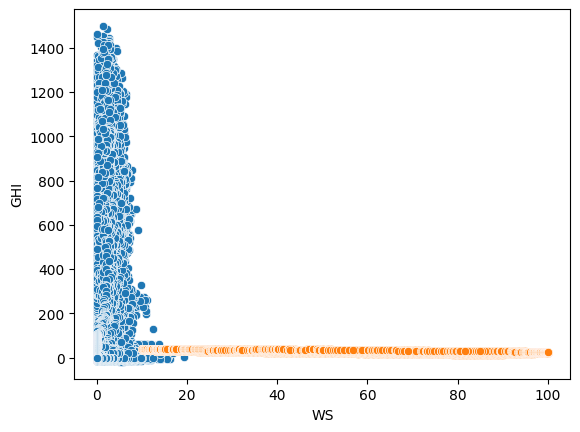

In [109]:
sns.scatterplot(data=df, x='WS', y='GHI'), sns.scatterplot(data=df, x='RH', y='Tamb')

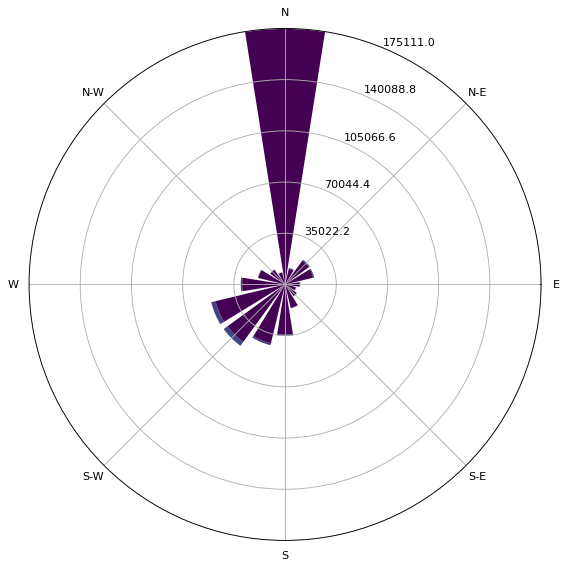

In [110]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'])

In [102]:
import pandas as pd
import os

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\hp\Music\data\sierraleone-bumbuna.csv', encoding='latin-1')

# Define the country variable
country = 'sierraleone'  # Set this to the appropriate country name

# Create the directory if it doesn't exist
os.makedirs('sierraleone/data', exist_ok=True)

# Export the cleaned DataFrame to a CSV file
df.to_csv(f'sierraleone/data/{"sierraleone"}_clean.csv', index=False)

<Axes: >

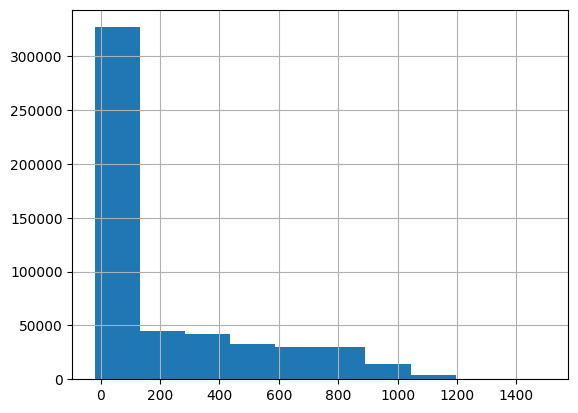

In [111]:
df['GHI'].hist()

<Axes: xlabel='RH', ylabel='Tamb'>

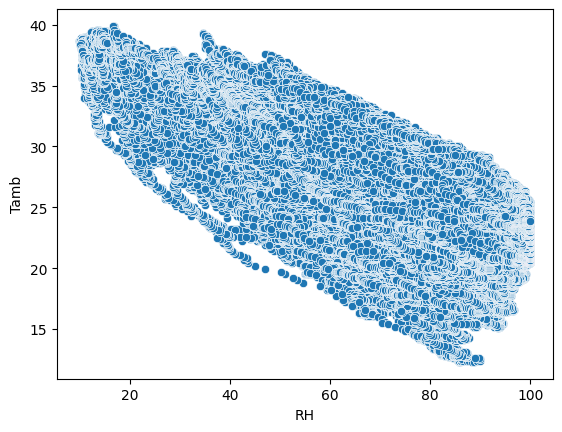

In [112]:
sns.scatterplot(data=df, x='RH', y='Tamb')

<Axes: xlabel='Tamb', ylabel='GHI'>

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


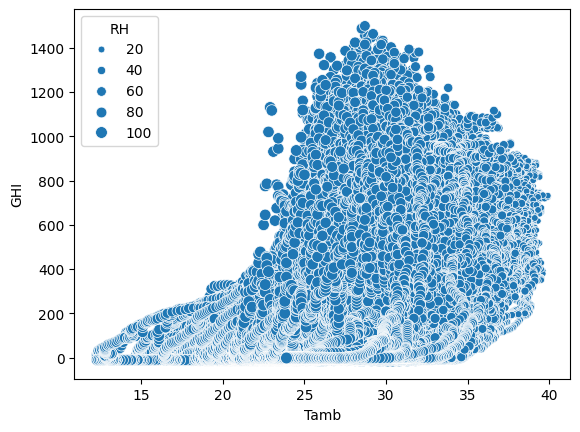

In [113]:
#Bubble Chart Analysis: Tamb vs. GHI with Size Representing RH
#The code snippet sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') generates a bubble chart to visualize the relationship between ambient temperature (Tamb) and Global Horizontal Irradiance (GHI), with the size of the bubbles representing relative humidity (RH). Here’s a detailed explanation:
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') 

C:\Users\hp\AppData\Local\Temp\ipykernel_19668\1128152864.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Timestamp')['GHI'].mean().plot(


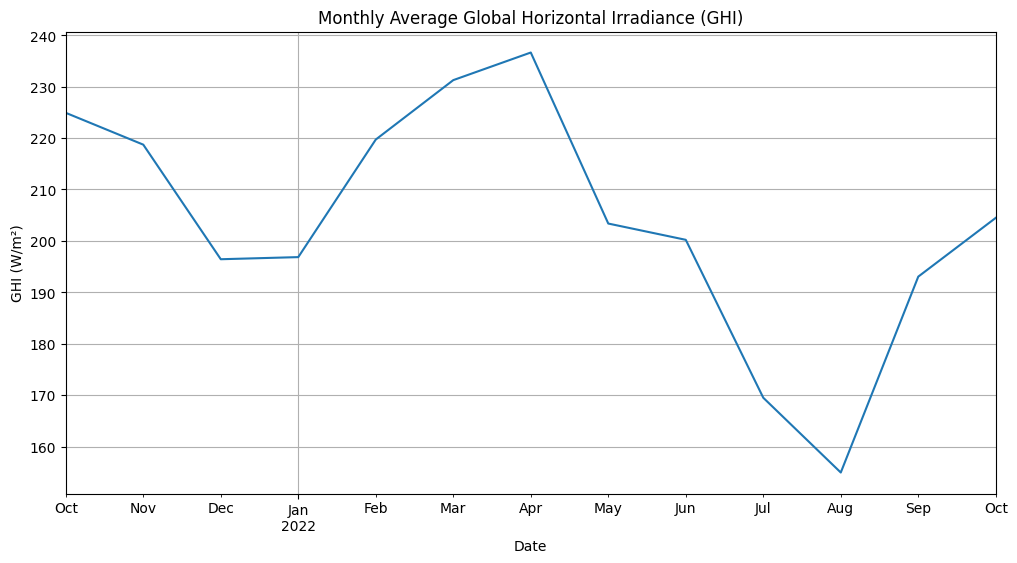

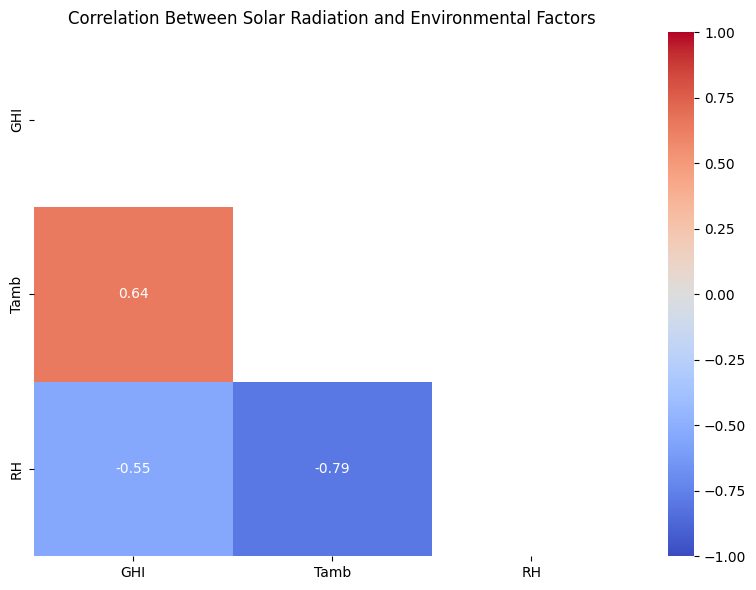

In [106]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Music\data\sierraleone-bumbuna.csv', encoding='latin-1')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# --- Outlier Detection ---
# Select relevant columns and drop missing values first
temp_df = df[['GHI','DNI','DHI']].dropna()
z_scores = np.abs(stats.zscore(temp_df))
df_clean = df[(z_scores < 3).all(axis=1)].copy()

# --- Time Series Plot ---
plt.figure(figsize=(12, 6))
df.resample('M', on='Timestamp')['GHI'].mean().plot(
    title='Monthly Average Global Horizontal Irradiance (GHI)',
    xlabel='Date',
    ylabel='GHI (W/m²)'
)
plt.grid(True)
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GHI','Tamb','RH']].corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(df[['GHI','Tamb','RH']].corr())))
plt.title('Correlation Between Solar Radiation and Environmental Factors')
plt.tight_layout()
plt.show()

In [114]:
print("Columns in dataset:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Columns in dataset: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [115]:
df_clean.to_csv(r'C:\Users\hp\Music\data\benin_clean.csv', index=False)